# Question 5$\\newcommand{\\ket}[1]{\\left\\lvert{#1}\\right\\rangle}\\newcommand{\\bra}[1]{\\left\\langle {#1}\\right|}\\newcommand{\\innerbraket}[2]{\\left\\langle{#1}\\lvert{#2}\\right\\rangle}\\newcommand{\\braket}[2]{\\left\\langle{#1},{#2}\\right\\rangle}$

In [95]:
%matplotlib inline
# white background for dark mode displaying graphs
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
# imports
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
# hide deprecation warnings produced from the qiskit library
import warnings
warnings.simplefilter('ignore')

# Load IBMQ Account

In [121]:
from qiskit import IBMQ
# following documentation from https://pypi.org/project/python-dotenv/
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import os
IBMQ.save_account(os.getenv('IBMQ_FREE_ACCOUNT'), overwrite=True)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-07 16:09:23,785: Credentials are already in use. The existing account in the session will be replaced.


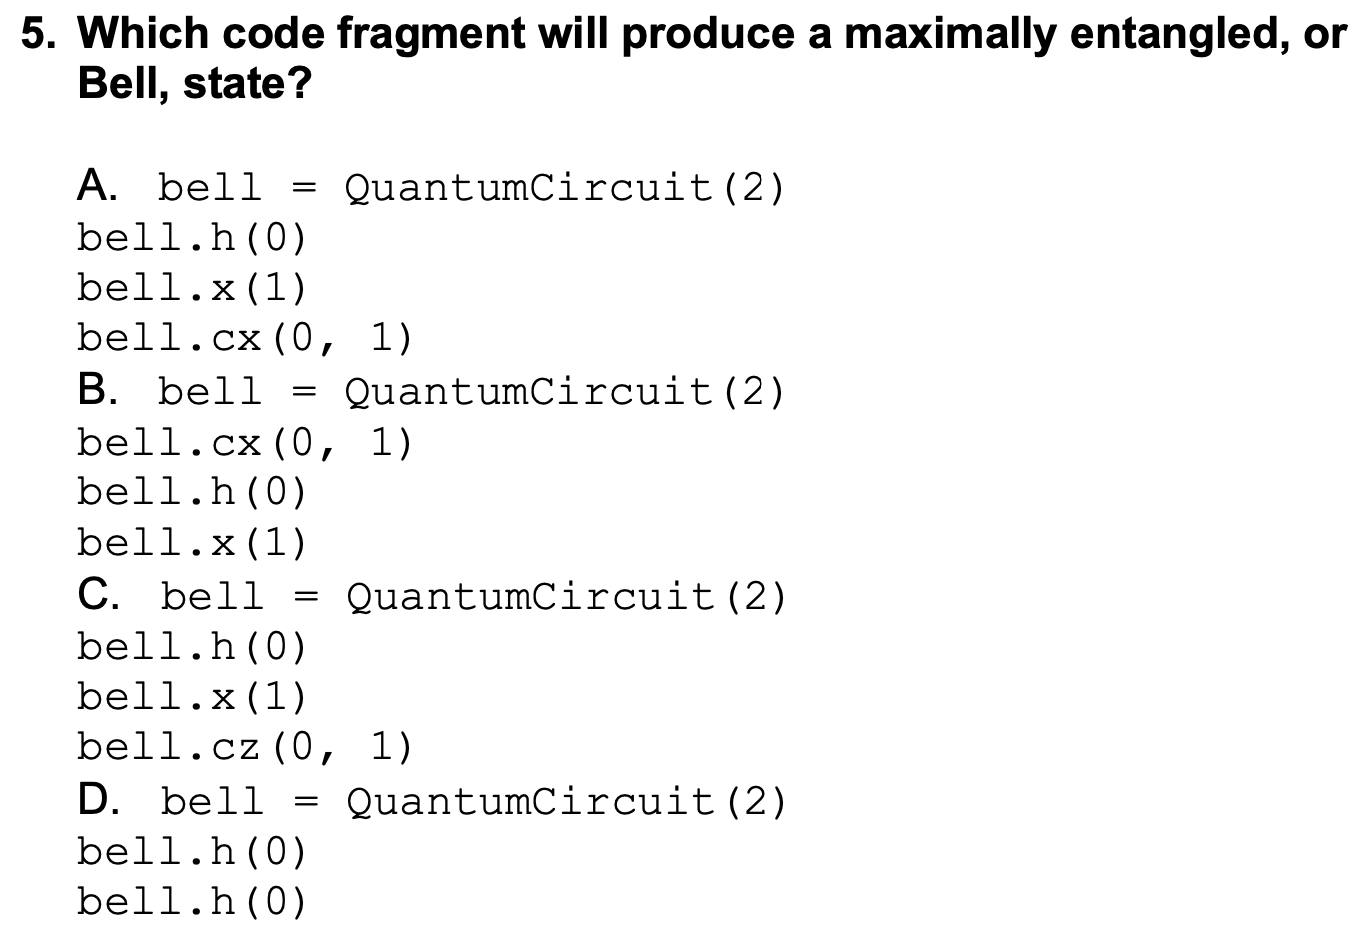

In [3]:
from IPython import display
display.Image("../Sample Question 5.png")

# A

In [107]:
bell = QuantumCircuit(2, name="A")
bell.h(0)
bell.x(1)
bell.cx(0, 1)

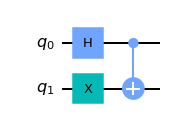

In [108]:
# make variables for the four options: qc1 - qc4 
qc1 = bell.copy() # make a copy of the object
qc1.measure_all()
bell.draw('mpl')

A's final result:
 Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


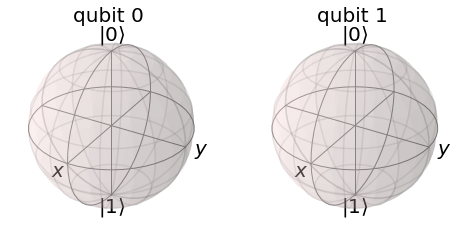

In [109]:
state_vec_A = Statevector(bell)
print("A's final result:\n", state_vec_A)
plot_bloch_multivector(state_vec_A)

# B

In [110]:
bell = QuantumCircuit(2, name="B")
bell.cx(0, 1)
bell.h(0)
bell.x(1)

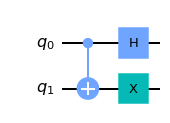

In [111]:
# make variables for the four options: qc1 - qc4 
qc2 = bell.copy() # make a copy of the object 
qc2.measure_all()
bell.draw('mpl')

B's final result:
 Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


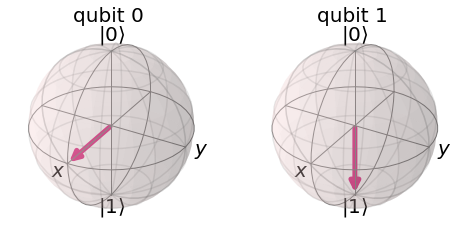

In [112]:
state_vec_B = Statevector(bell)
print("B's final result:\n", state_vec_B)
plot_bloch_multivector(state_vec_B)

# C

In [113]:
bell = QuantumCircuit(2, name="C")
bell.h(0)
bell.x(1)
bell.cz(0, 1)

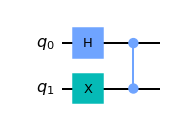

In [114]:
# make variables for the four options: qc1 - qc4 
qc3 = bell.copy() # make a copy of the object 
qc3.measure_all()
bell.draw('mpl')

C's final result:
 Statevector([ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
             -0.70710678+0.j],
            dims=(2, 2))


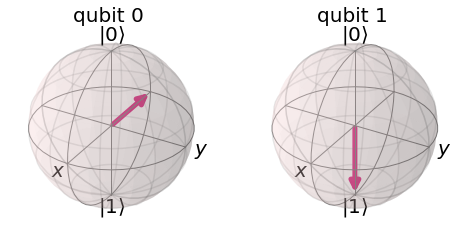

In [115]:
state_vec_C = Statevector(bell)
print("C's final result:\n", state_vec_C)
plot_bloch_multivector(state_vec_C)

# D

In [116]:
bell = QuantumCircuit(2, name="D")
bell.h(0)
bell.h(0)

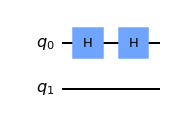

In [117]:
# make variables for the four options: qc1 - qc4 
qc4 = bell.copy() # make a copy of the object 
qc4.measure_all()
bell.draw('mpl')

D's final result:
 Statevector([ 1.00000000e+00+0.j, -2.23711432e-17+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j],
            dims=(2, 2))


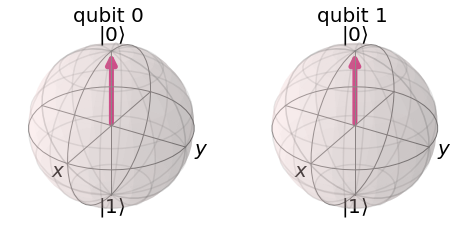

In [118]:
state_vec_D = Statevector(bell)
print("D's final result:\n", state_vec_D)
plot_bloch_multivector(state_vec_D)

## Get results from real hardware

In [122]:
# run it on real hardware to see if any physcial effects are detected
real_hardware = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                            and not x.configuration().simulator
                                            and x.status().operational==True))
# execute all four circuits as one job
job = execute([qc1, qc2, qc3, qc4], backend=real_hardware, shots=1024)

In [123]:
result = job.result()
counts_qc1 = result.get_counts(qc1)
counts_qc2 = result.get_counts(qc2)
counts_qc3 = result.get_counts(qc3)
counts_qc4 = result.get_counts(qc4)
print("qc1 counts:",counts_qc1)
print("qc2 counts:",counts_qc2)
print("qc3 counts:",counts_qc3)
print("qc4 counts:",counts_qc4)

qc1 counts: {'00': 88, '01': 463, '10': 444, '11': 29}
qc2 counts: {'00': 45, '01': 45, '10': 519, '11': 415}
qc3 counts: {'00': 72, '01': 37, '10': 490, '11': 425}
qc4 counts: {'00': 999, '01': 8, '10': 16, '11': 1}


## Compare measured results 

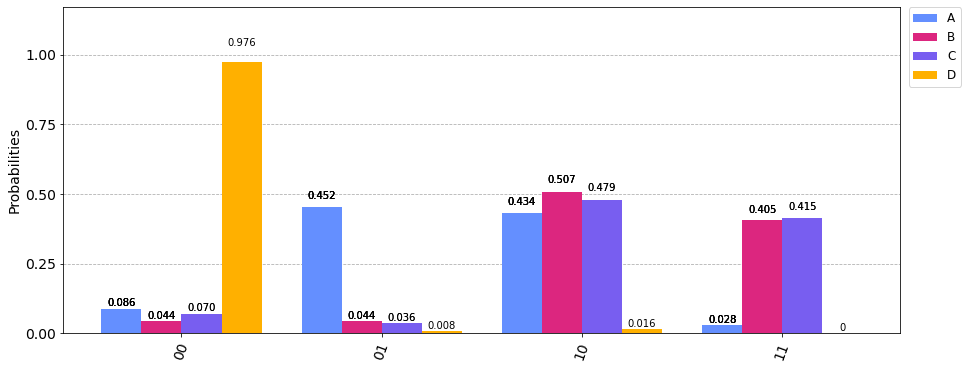

In [124]:
plot_histogram([counts_qc1, counts_qc2, counts_qc3, counts_qc4], 
               legend=["A", "B", "C", "D"], figsize=(15,6))

# Circuits for all four Bell states

## Bell 1
$$
\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) = 
    \begin{pmatrix}
        \frac{1}{\sqrt{2}} \\
        0 \\
        0 \\
        \frac{1}{\sqrt{2}} \\
    \end{pmatrix}
$$

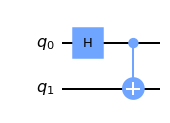

In [54]:
bell1 = QuantumCircuit(2, name="Bell state 1")
bell1.h(0)
bell1.cx(0, 1)
bell1.draw('mpl')

## Bell 2
$$
|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) = 
    \begin{pmatrix}
        \frac{1}{\sqrt{2}} \\
        0 \\
        0 \\
        -\frac{1}{\sqrt{2}} \\
    \end{pmatrix}\\
$$

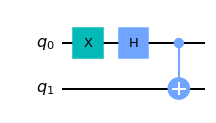

In [55]:
bell2 = QuantumCircuit(2, name="Bell state 2")
bell2.x(0)
bell2.h(0)
bell2.cx(0, 1)
bell2.draw('mpl')

## Bell 3
$$
|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) =
    \begin{pmatrix}
        0 \\
        \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} \\
        0 \\
    \end{pmatrix}\\
$$

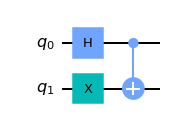

In [56]:
bell3 = QuantumCircuit(2, name="Bell state 3")
bell3.h(0)
bell3.x(1)
bell3.cx(0, 1)
bell3.draw('mpl')

## Bell 4
$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle) =
    \begin{pmatrix}
        0 \\
        \frac{1}{\sqrt{2}} \\
        -\frac{1}{\sqrt{2}} \\
        0 \\
    \end{pmatrix}
$$

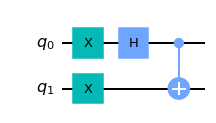

In [59]:
bell4 = QuantumCircuit(2, name="Bell state 4")
bell4.x([0,1])
bell4.h(0)
bell4.cx(0, 1)
bell4.draw('mpl')

Bell 4 final result:
 Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


/opt/anaconda3/envs/quantum_finance/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


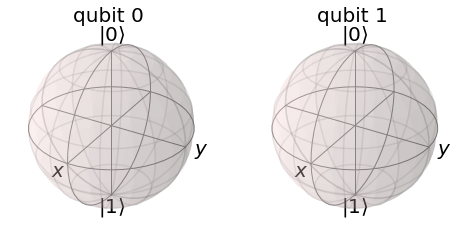

In [82]:
state_vec4 = Statevector(bell4)
print("Bell 4 final result:\n", state_vec4)
plot_bloch_multivector(state_vec4)